In [33]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactiveity = 'all'

import numpy as np
import pandas as pd
import torch
import yfinance as yf
from scipy.fftpack import fft, ifft, fftfreq

from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
import seaborn; seaborn.set()
%matplotlib inline

In [2]:
russell = yf.download("^RUA")
russell

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1987-09-10,178.960007,178.960007,177.050003,178.830002,178.830002,0
1987-09-11,178.830002,181.470001,178.830002,181.339996,181.339996,0
1987-09-14,181.339996,182.250000,180.750000,181.789993,181.789993,0
1987-09-15,181.789993,181.789993,179.259995,179.270004,179.270004,0
1987-09-16,179.270004,180.630005,177.860001,177.889999,177.889999,0
...,...,...,...,...,...,...
2022-01-21,2602.810059,2610.260010,2551.820068,2552.540039,2552.540039,0
2022-01-24,2551.000000,2569.959961,2452.550049,2565.949951,2565.949951,0
2022-01-25,2563.280029,2563.889893,2493.129883,2531.379883,2531.379883,0


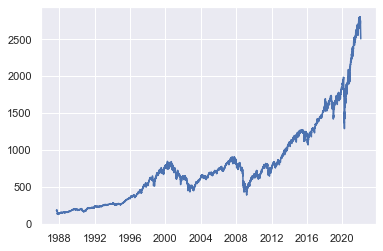

In [3]:
price = russell[['Adj Close']]
plt.plot(price)

,ret
Date,
1988-09-30,-0.243320
1988-10-31,0.026880
1988-11-30,0.096924
1988-12-31,0.036260
1989-01-31,0.061870
...,...
2021-09-30,0.198928
2021-10-31,0.317794
2021-11-30,0.144917


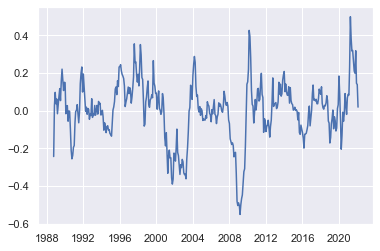

In [4]:
price.index = pd.to_datetime(price.index)
price = price.resample('M').last()
ret_12 = (price / price.shift(12) - 1).dropna()
ret_12.columns = ['ret']
ret_12 = ret_12 - ret_12.mean()

plt.plot(ret_12)
ret_12

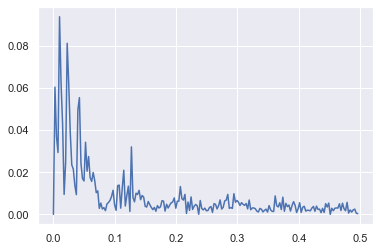

In [5]:
# 数据长度
N = len(ret_12)
# 采样频率
fs = 1

x = np.array(ret_12.index)
y = np.array(ret_12['ret'])
y_f = fft(y)
# x_f = np.linspace(0.0, 1.0 / (2.0 * T), N // 2)
x_f = fftfreq(N, 1 / fs)[:N // 2]

plt.plot(x_f, 2.0 / N * np.abs(y_f[: N // 2]))
plt.show()
df = pd.DataFrame(2.0 / N * np.abs(y_f[: N // 2]), columns=['A'], index=x_f)
df
df['T'] = 1 / df.index

In [6]:
df_sorted = df.sort_values("A", ascending=False)
df_sorted.head(10)

,A,T
0.009975,0.093809,100.250000
0.022444,0.081218,44.555556
0.024938,0.062328,40.100000
0.012469,0.062226,80.200000
0.002494,0.060393,401.000000
0.042394,0.055416,23.588235
0.039900,0.049661,25.062500
0.014963,0.042877,66.833333
0.027431,0.039064,36.454545
0.004988,0.036973,200.500000


In [7]:
df.set_index("T", inplace=True)

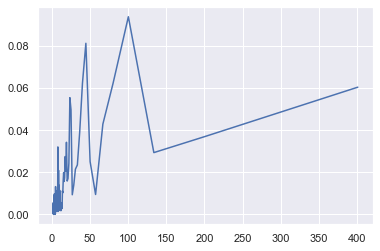

In [8]:
plt.plot(df)

In [9]:
df = df.iloc[:0:-1]

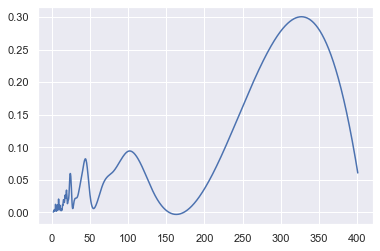

In [10]:
from scipy.interpolate import make_interp_spline

x = np.array(df.index)
y = np.array(df['A'])
x_smooth = np.linspace(x.min(), x.max(), 1000) #300 represents number of points to make between T.min and T.max
y_smooth = make_interp_spline(x, y)(x_smooth)
plt.plot(x_smooth, y_smooth)

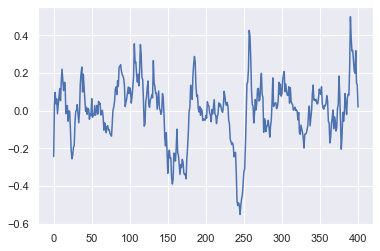

In [18]:
plt.plot(range(len(np.array(ret_12.index))), ret_12)

### 42月滤波

-0.8683501841180813

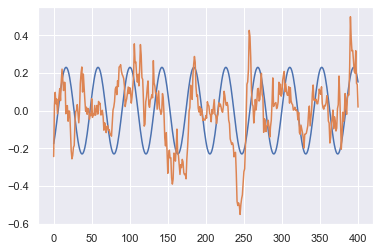

In [31]:
t = np.arange(401)
T1 = 42
A1 = 0.3
Phi1 = 0.1
y = A1 * np.sin(2 * np.pi / T1 * t + Phi1)
lr = 0.01
cnt = 0
ret_np = np.array(ret_12['ret'])

while(True):
    cnt += 1
    cost_A1 = ((y - ret_np) * np.sin(2 * np.pi / T1 * t + Phi1)).sum()
    cost_Phi1 = ((y - ret_np) * np.cos(Phi1)).sum()
    A1 = A1 - lr * cost_A1
    Phi1 = Phi1 - lr * cost_Phi1
    y = A1 * np.sin(2 * np.pi / T1 * t + Phi1)
    if cnt == 100:
        break

plt.plot(y)
plt.plot(ret_np)
Phi1

### 87月滤波

-1.2082467920855593

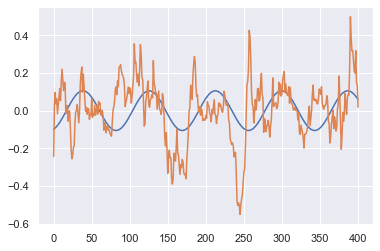

In [32]:
t = np.arange(401)
T1 = 87
A1 = 0.3
Phi1 = 0.1
y = A1 * np.sin(2 * np.pi / T1 * t + Phi1)
lr = 0.01
cnt = 0
ret_np = np.array(ret_12['ret'])

while(True):
    cnt += 1
    cost_A1 = ((y - ret_np) * np.sin(2 * np.pi / T1 * t + Phi1)).sum()
    cost_Phi1 = ((y - ret_np) * np.cos(Phi1)).sum()
    A1 = A1 - lr * cost_A1
    Phi1 = Phi1 - lr * cost_Phi1
    y = A1 * np.sin(2 * np.pi / T1 * t + Phi1)
    if cnt == 100:
        break

plt.plot(y)
plt.plot(ret_np)
Phi1

In [ ]:
### 42与87滤波

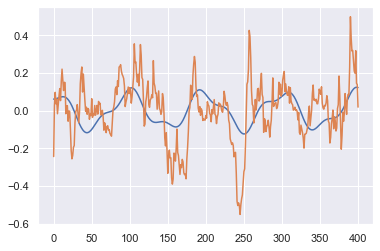

In [47]:
t = np.arange(401)
T1 = 42
T2 = 100
A1 = 0.1
A2= 0.1
Phi1 = -0.87
Phi2 = -1.2
y = A1 * np.sin(2 * np.pi / T1 * t + Phi1) + A2 * np.sin(2 * np.pi / T2 * t + Phi2)
lr = 0.005
cnt = 0
ret_np = np.array(ret_12['ret'])

while(True):
    cnt += 1
    cost_A1 = ((y - ret_np) * np.sin(2 * np.pi / T1 * t + Phi1)).sum()
    cost_A2 = ((y - ret_np) * np.sin(2 * np.pi / T2 * t + Phi2)).sum()
    cost_Phi1 = ((y - ret_np) * np.cos(Phi1)).sum()
    cost_Phi2 = ((y - ret_np) * np.cos(Phi2)).sum()
    A1 = A1 - lr * cost_A1
    A2 = A2 - lr * cost_A2
    Phi1 = Phi1 - lr * cost_Phi1
    Phi2 = Phi2 - lr * cost_Phi2
    y = A1 * np.sin(2 * np.pi / T1 * t + Phi1) + A2 * np.sin(2 * np.pi / T2 * t + Phi2)
    if cnt == 1000:
        break

y1 = A1 * np.sin(2 * np.pi / T1 * t + Phi1)
y2 = A2 * np.sin(2 * np.pi / T2 * t + Phi2)
plt.plot(y)
plt.plot(ret_np)

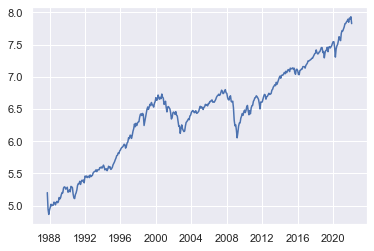

In [50]:
plt.plot(np.log(price['Adj Close']))